# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import sklearn


 #loading training data

In [2]:
dataset=pd.read_csv("./fraudTrain.csv");
dataset.head(5)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [3]:
#size of data
dataset.shape

(1296675, 23)

In [4]:
#description of data
dataset.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

# Data preprocessing

In [6]:
#Drop unnecessary columns for training
column_to_drop=["Unnamed: 0","trans_date_trans_time","cc_num","merchant","first","last","street","city","state","zip","job","dob","trans_num","unix_time"]
df=dataset.drop(columns=column_to_drop)
df.head()

,category,amt,gender,lat,long,city_pop,merch_lat,merch_long,is_fraud
0,misc_net,4.97,F,36.0788,-81.1781,3495,36.011293,-82.048315,0
1,grocery_pos,107.23,F,48.8878,-118.2105,149,49.159047,-118.186462,0
2,entertainment,220.11,M,42.1808,-112.2620,4154,43.150704,-112.154481,0
3,gas_transport,45.00,M,46.2306,-112.1138,1939,47.034331,-112.561071,0
4,misc_pos,41.96,M,38.4207,-79.4629,99,38.674999,-78.632459,0


In [7]:
#info after droping some columns
df.describe()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 9 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   category    1296675 non-null  object 
 1   amt         1296675 non-null  float64
 2   gender      1296675 non-null  object 
 3   lat         1296675 non-null  float64
 4   long        1296675 non-null  float64
 5   city_pop    1296675 non-null  int64  
 6   merch_lat   1296675 non-null  float64
 7   merch_long  1296675 non-null  float64
 8   is_fraud    1296675 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 89.0+ MB


In [8]:

category_count=df["category"].value_counts()
category_count

category
gas_transport     131659
grocery_pos       123638
home              123115
shopping_pos      116672
kids_pets         113035
shopping_net       97543
entertainment      94014
food_dining        91461
personal_care      90758
health_fitness     85879
misc_pos           79655
misc_net           63287
grocery_net        45452
travel             40507
Name: count, dtype: int64

In [9]:
#importing label encoder inorder to encode string into number
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
#gender encoding
label.fit(df.gender.drop_duplicates())
df.gender=label.transform(df.gender)
#category encoding
label.fit(df.category.drop_duplicates())
df.category=label.transform(df.category)

df.tail(10)


,category,amt,gender,lat,long,city_pop,merch_lat,merch_long,is_fraud
1296665,6,72.17,1,45.7549,-84.4470,95,44.938461,-83.996234,0
1296666,5,7.30,0,41.0646,-87.5917,2135,40.556811,-88.092339,0
1296667,13,19.71,1,28.0758,-81.5929,33804,27.465871,-81.511804,0
1296668,7,100.85,0,32.1530,-90.1217,19685,31.377697,-90.528450,0
1296669,9,37.38,0,41.4972,-98.7858,509,41.728638,-99.039660,0
1296670,0,15.56,1,37.7175,-112.4777,258,36.841266,-111.690765,0
1296671,1,51.70,1,39.2667,-77.5101,100,38.906881,-78.246528,0
1296672,1,105.93,1,32.9396,-105.8189,899,33.619513,-105.130529,0
1296673,1,74.90,1,43.3526,-102.5411,1126,42.788940,-103.241160,0
1296674,1,4.30,1,45.8433,-113.8748,218,46.565983,-114.186110,0


In [10]:
category_count=df["category"].value_counts()
category_count

category
2     131659
4     123638
6     123115
12    116672
7     113035
11     97543
0      94014
1      91461
10     90758
5      85879
9      79655
8      63287
3      45452
13     40507
Name: count, dtype: int64

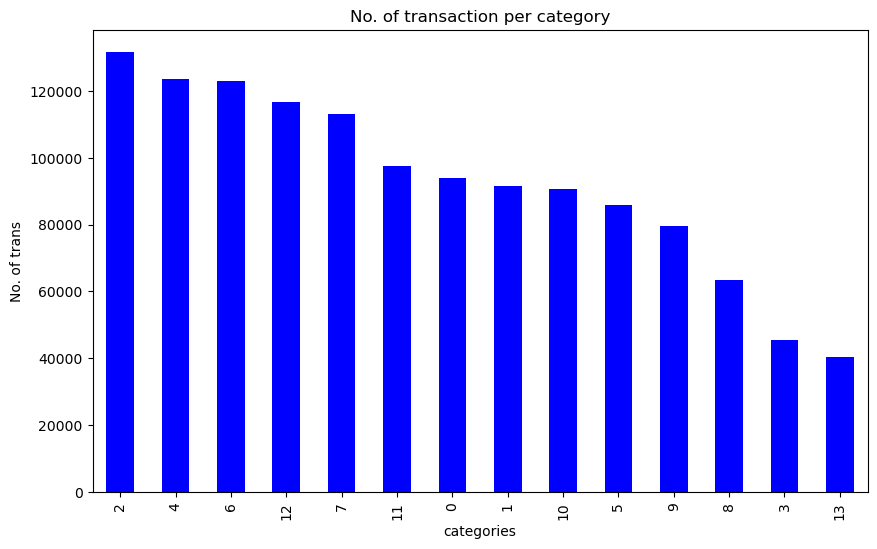

In [11]:
plt.figure(figsize=(10,6))
category_count.plot(kind='bar',color='blue')
plt.title("No. of transaction per category")
plt.xlabel("categories")
plt.ylabel("No. of trans")
plt.show()


In [12]:
cat_counts=df.groupby(["category","is_fraud"])["is_fraud"].count().unstack()
cat_counts

is_fraud,0,1
category,,
0,93781,233
1,91310,151
2,131041,618
3,45318,134
4,121895,1743
5,85746,133
6,122917,198
7,112796,239
8,62372,915


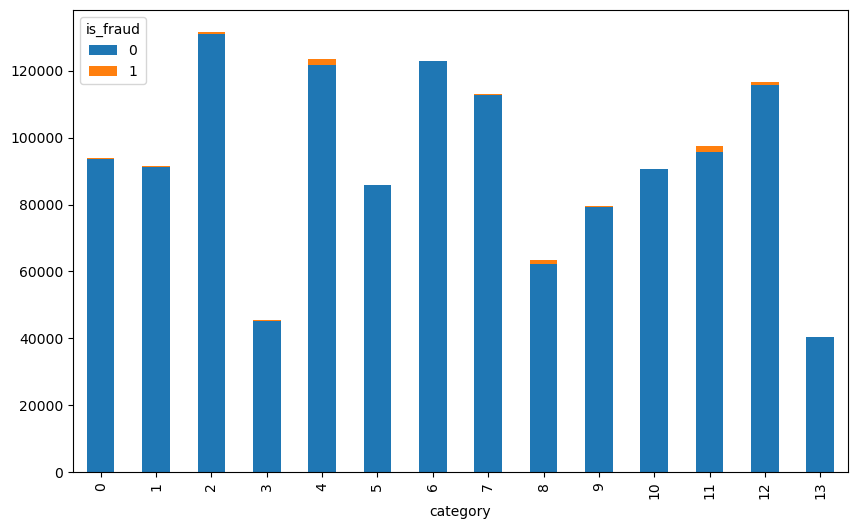

In [13]:
#barplot showing both fraud or legit trans by category
fullplot=cat_counts.plot(kind="bar",stacked=True, figsize=(10,6))
plt.show()

In [14]:
# fraud or legit
fraud_count=df['is_fraud'].value_counts()
fraud_count

is_fraud
0    1289169
1       7506
Name: count, dtype: int64

#dataset is highly unbalanced


In [15]:
#seperating fraud and legit data for analysis
legit=df[df.is_fraud==0]
fraud=df[df.is_fraud==1]


In [16]:
legit.shape


(1289169, 9)

In [17]:
fraud.shape

(7506, 9)

In [18]:
legit.describe()

,category,amt,gender,lat,long,city_pop,merch_lat,merch_long,is_fraud
count,1.289169e+06,1.289169e+06,1.289169e+06,1.289169e+06,1.289169e+06,1.289169e+06,1.289169e+06,1.289169e+06,1289169.0
mean,6.221754e+00,6.766711e+01,4.522611e-01,3.853689e+01,-9.022814e+01,8.877523e+04,3.853666e+01,-9.022827e+01,0.0
std,3.913438e+00,1.540080e+02,4.977160e-01,5.075234e+00,1.375598e+01,3.018065e+05,5.109144e+00,1.376794e+01,0.0
min,0.000000e+00,1.000000e+00,0.000000e+00,2.002710e+01,-1.656723e+02,2.300000e+01,1.902779e+01,-1.666712e+02,0.0
25%,3.000000e+00,9.610000e+00,0.000000e+00,3.462050e+01,-9.679800e+01,7.430000e+02,3.473145e+01,-9.689853e+01,0.0
50%,6.000000e+00,4.728000e+01,0.000000e+00,3.935430e+01,-8.747690e+01,2.456000e+03,3.936528e+01,-8.744091e+01,0.0
75%,1.000000e+01,8.254000e+01,1.000000e+00,4.194040e+01,-8.015800e+01,2.032800e+04,4.195705e+01,-8.023853e+01,0.0
max,1.300000e+01,2.894890e+04,1.000000e+00,6.568990e+01,-6.795030e+01,2.906700e+06,6.668291e+01,-6.695090e+01,0.0


In [19]:
fraud.describe()

,category,amt,gender,lat,long,city_pop,merch_lat,merch_long,is_fraud
count,7506.000000,7506.000000,7506.000000,7506.000000,7506.000000,7.506000e+03,7506.000000,7506.000000,7506.0
mean,7.264055,531.320092,0.502398,38.663609,-89.916041,9.727676e+04,38.653901,-89.915808,1.0
std,3.774006,390.560070,0.500028,5.172289,14.278221,3.265815e+05,5.218387,14.298685,0.0
min,0.000000,1.060000,0.000000,20.027100,-165.672300,2.300000e+01,19.425114,-166.550779,1.0
25%,4.000000,245.662500,0.000000,35.056100,-96.701000,7.465000e+02,35.114671,-96.671038,1.0
50%,8.000000,396.505000,1.000000,39.433600,-86.691900,2.623000e+03,39.427008,-86.813044,1.0
75%,11.000000,900.875000,1.000000,42.073175,-79.941600,2.143700e+04,41.986902,-79.907096,1.0
max,13.000000,1376.040000,1.000000,66.693300,-68.556500,2.906700e+06,67.510267,-67.569238,1.0


In [20]:
#making similar distribution of both trans
legit_sample=legit.sample(n=7506)

In [21]:
new_dataset=pd.concat([legit_sample,fraud],axis=0)
new_dataset

,category,amt,gender,lat,long,city_pop,merch_lat,merch_long,is_fraud
1101983,1,416.76,1,35.5762,-91.4539,111,36.501883,-91.777284,0
835962,10,14.11,1,38.5072,-81.8900,5512,37.763150,-81.003959,0
934187,0,17.82,0,30.5354,-95.4532,4993,29.695723,-96.322177,0
898298,13,2.66,0,33.0067,-117.0690,1241364,32.125581,-116.574641,0
236030,6,109.38,0,46.3535,-86.6345,765,46.259549,-87.285870,0
...,...,...,...,...,...,...,...,...,...
1295399,11,977.01,0,27.6330,-80.4031,105638,26.888686,-80.834389,1
1295491,11,1210.91,0,27.6330,-80.4031,105638,28.216707,-79.855648,1
1295532,2,10.24,1,30.4590,-90.9027,71335,29.700456,-91.361632,1
1295666,2,21.69,0,31.8599,-102.7413,23,32.675272,-103.484949,1


In [22]:
new_dataset.groupby('is_fraud').mean()

,category,amt,gender,lat,long,city_pop,merch_lat,merch_long
is_fraud,,,,,,,,
0,6.245803,70.158132,0.463096,38.655191,-90.242023,87556.131628,38.649468,-90.240042
1,7.264055,531.320092,0.502398,38.663609,-89.916041,97276.763256,38.653901,-89.915808


# Creating model and training data

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix

In [24]:
X_train=new_dataset.drop("is_fraud",axis=1)
Y_train=new_dataset["is_fraud"]
logistic_model=LogisticRegression()
logistic_model.fit(X_train,Y_train)

LogisticRegression()

In [25]:
#loading test data
test_dataset=pd.read_csv("./fraudTest.csv");
test_dataset.head(5)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [26]:
#Drop unnecessary columns for training
column_to_drop=["Unnamed: 0","trans_date_trans_time","cc_num","merchant","first","last","street","city","state","zip","job","dob","trans_num","unix_time"]
test=test_dataset.drop(columns=column_to_drop)
test.head()

,category,amt,gender,lat,long,city_pop,merch_lat,merch_long,is_fraud
0,personal_care,2.86,M,33.9659,-80.9355,333497,33.986391,-81.200714,0
1,personal_care,29.84,F,40.3207,-110.4360,302,39.450498,-109.960431,0
2,health_fitness,41.28,F,40.6729,-73.5365,34496,40.495810,-74.196111,0
3,misc_pos,60.05,M,28.5697,-80.8191,54767,28.812398,-80.883061,0
4,travel,3.19,M,44.2529,-85.0170,1126,44.959148,-85.884734,0


In [27]:
#gender encoding
label.fit(test.gender.drop_duplicates())
test.gender=label.transform(test.gender)
#category encoding
label.fit(test.category.drop_duplicates())
test.category=label.transform(test.category)

test.tail(10)


,category,amt,gender,lat,long,city_pop,merch_lat,merch_long,is_fraud
555709,0,46.71,0,39.8127,-120.6405,1725,38.963543,-120.457121,0
555710,11,29.56,0,27.6330,-80.4031,105638,27.593881,-80.855092,0
555711,6,12.68,1,64.7556,-165.6723,145,65.623593,-165.186033,0
555712,7,13.02,1,41.5403,-122.9366,308,41.973127,-123.553032,0
555713,6,17.00,0,32.6176,-86.9475,1412,32.164145,-87.539669,0
555714,5,43.77,1,40.4931,-91.8912,519,39.946837,-91.333331,0
555715,7,111.84,1,29.0393,-95.4401,28739,29.661049,-96.186633,0
555716,7,86.88,0,46.1966,-118.9017,3684,46.658340,-119.715054,0
555717,13,7.99,1,44.6255,-116.4493,129,44.470525,-117.080888,0
555718,0,38.13,1,35.6665,-97.4798,116001,36.210097,-97.036372,0


In [28]:
X_test=test.drop("is_fraud",axis=1)
Y_test=test["is_fraud"]
Y_pred=logistic_model.predict(X_test)

Accuracy Score

In [29]:
logistic_model.score(X_test,Y_test)

0.9527045143318835

In [30]:
training_accuracy=accuracy_score(Y_test,Y_pred)
print("Accuracy : ",training_accuracy)

Accuracy :  0.9527045143318835


# Confusion matrix

In [31]:
cm=confusion_matrix(Y_test,Y_pred)
print(cm)

[[527829  25745]
 [   538   1607]]


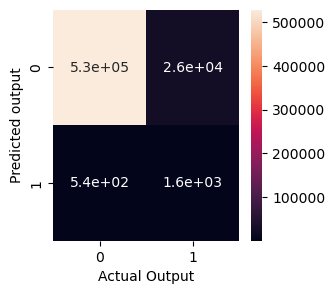

In [32]:
plt.figure(figsize=(3,3))
sb.heatmap(cm,annot=True)
plt.ylabel("Predicted output")
plt.xlabel("Actual Output")
plt.show()

#Using decision tree


In [33]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [47]:
clf_entropy=DecisionTreeClassifier(criterion="entropy", random_state=42)
clf_entropy.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [48]:
Y_predict=clf_entropy.predict(X_test)

In [49]:
decisiontree_accuracy=accuracy_score(Y_test,Y_predict)
print("Accuracy (using decisiontree) : ",decisiontree_accuracy)

Accuracy (using decisiontree) :  0.954491388633464


#using random forest classifier

In [50]:
from sklearn.ensemble import RandomForestClassifier


In [52]:
rf_model=RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train,Y_train)

RandomForestClassifier(random_state=42)

In [53]:
Y_predict_rf=rf_model.predict(X_test)

In [54]:
rf_accuracy=accuracy_score(Y_test,Y_predict_rf)
print("Accuracy (using decisiontree) : ",rf_accuracy)

Accuracy (using decisiontree) :  0.9656786973272463


# Conclusion:
Logistic Regression: Accuracy - 95.27%

Decision Tree: Accuracy - 95.45%

Random Forest Classifier: Accuracy - 96.57%

The random forest classifier achieved the highest accuracy among the three models